In [3]:
from grosspita import GrossPitaevskiiProblem
import csv
import numpy as np

In [2]:
section_a0 = GrossPitaevskiiProblem(
                                    particle_number=1000000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=False
                                    )

In [3]:
chemical_potential_section_a0 = section_a0.evolution()

100%|██████████| 20000/20000 [00:27<00:00, 727.48it/s]


In [4]:
energy_section_a0 = section_a0.energy

In [5]:
print("e=",f"{energy_section_a0:.2f}","\n","mu=",f"{chemical_potential_section_a0:.2f}")

e= 1.50 
 mu= 1.50


In [9]:
number_of_particles_list = [100,1000,10000,100000,1000000]
with open("a.csv","w") as file:
    writer = csv.writer(file)
    writer.writerow(["N","mu","e_kin","e_trap","e_int","e"])
    for number_of_particles in number_of_particles_list:
        print(f"Starting calculation for {number_of_particles} particles")
        section_a = GrossPitaevskiiProblem(
                                    particle_number=number_of_particles,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
        
        chemical_potential_section_a = section_a.evolution()

        kinetic_energy_section_a = section_a.kinetic_term
        trap_energy_section_a = section_a.trap_term
        interaction_energy_section_a = section_a.interaction_term
        energy_section_a = section_a.energy


        writer.writerow([number_of_particles,
                        chemical_potential_section_a,
                        kinetic_energy_section_a,
                        trap_energy_section_a,
                        interaction_energy_section_a,
                        energy_section_a])

Starting calculation for 100 particles


100%|██████████| 20000/20000 [00:27<00:00, 723.80it/s]


Starting calculation for 1000 particles


100%|██████████| 20000/20000 [00:27<00:00, 719.25it/s]


Starting calculation for 10000 particles


100%|██████████| 20000/20000 [00:27<00:00, 716.98it/s]


Starting calculation for 100000 particles


100%|██████████| 20000/20000 [00:27<00:00, 718.23it/s]


Starting calculation for 1000000 particles


100%|██████████| 20000/20000 [00:27<00:00, 716.03it/s]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("a.csv")
df.head()

,N,mu,e_kin,e_trap,e_int,e
0,100,1.785294,0.648456,0.870359,0.133236,1.652051
1,1000,3.042935,0.436422,1.369978,0.618266,2.424665
2,10000,6.865669,0.240311,2.977074,1.824141,5.041526
3,100000,16.846680,0.123681,7.237536,4.742731,12.103947
4,1000000,42.123843,0.062219,18.054772,12.003426,30.120417


In [10]:
number_of_particles_list = [100,1000,10000,100000,1000000]
with open("b.csv","w") as file:
    writer = csv.writer(file)
    writer.writerow(["N","mu","e_kin","e_trap","e_int","e"])
    for number_of_particles in number_of_particles_list:
        print(f"Starting calculation for {number_of_particles} particles")
        section_a = GrossPitaevskiiProblem(
                                    particle_number=number_of_particles,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=50000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )
        
        chemical_potential_section_a = section_a.evolution()

        kinetic_energy_section_a = section_a.kinetic_term
        trap_energy_section_a = section_a.trap_term
        interaction_energy_section_a = section_a.interaction_term
        energy_section_a = section_a.energy


        writer.writerow([number_of_particles,
                        chemical_potential_section_a,
                        kinetic_energy_section_a,
                        trap_energy_section_a,
                        interaction_energy_section_a,
                        energy_section_a])

Starting calculation for 100 particles


100%|██████████| 50000/50000 [01:10<00:00, 708.78it/s]


Starting calculation for 1000 particles


100%|██████████| 50000/50000 [01:10<00:00, 711.79it/s]


Starting calculation for 10000 particles


100%|██████████| 50000/50000 [01:10<00:00, 707.70it/s]


Starting calculation for 100000 particles


100%|██████████| 50000/50000 [01:11<00:00, 696.34it/s]


Starting calculation for 1000000 particles


100%|██████████| 50000/50000 [01:10<00:00, 712.40it/s]


In [11]:
df2 = pd.read_csv("b.csv")
df2.head()

,N,mu,e_kin,e_trap,e_int,e
0,100,1.044837,3.307893e-15,0.472240,0.286296,0.758536
1,1000,2.646779,1.827007e-15,1.147120,0.749827,1.896947
2,10000,6.664047,9.564318e-16,2.862097,1.900974,4.763071
3,100000,16.748602,4.960250e-16,7.179275,4.784663,11.963938
4,1000000,42.077815,2.890607e-16,18.026177,12.025766,30.051943


In [6]:
section_c1 = GrossPitaevskiiProblem(
                                    particle_number=1000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
section_c1t = GrossPitaevskiiProblem(
                                    particle_number=1000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )
section_c2 = GrossPitaevskiiProblem(
                                    particle_number=100000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )
section_c2t = GrossPitaevskiiProblem(
                                    particle_number=100000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=True,
                                    interacting_system=True
                                    )

In [7]:
chemical_potential_section_c1 = section_c1.evolution()
chemical_potential_section_c1t = section_c1t.evolution()
chemical_potential_section_c2 = section_c2.evolution()
chemical_potential_section_c2t = section_c2t.evolution()

100%|██████████| 20000/20000 [00:38<00:00, 523.24it/s]


In [8]:
density_c1=section_c1.density
density_c1t=section_c1t.density
density_c2=section_c2.density
density_c2t=section_c2t.density

In [9]:
with open("d.csv","w") as file:
    writer = csv.writer(file)
    for i in range(len(density_c1)):
        writer.writerow([density_c1[i],density_c2[i],density_c1t[i],density_c2t[i]])
x = np.zeros(len(density_c1))
for i in range(0,len(density_c1)):
    x[i]=0.02*i

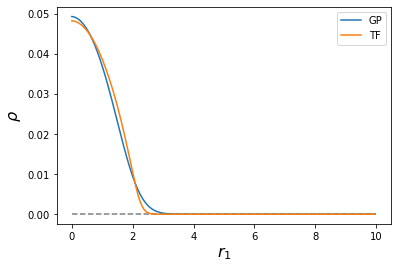

In [12]:
import matplotlib.pyplot as plt
plt.plot(x,density_c1,label='GP')
plt.plot(x,density_c1t,label='TF')
plt.legend()
plt.hlines(0,xmin=0,xmax=10, linestyles='dashed', colors='grey')
plt.xlabel('$r_{1}$',fontsize=16)
plt.ylabel(r"$\rho$",fontsize=16)
plt.rc("axes",labelsize=16)
plt.savefig('N1.png',bbox_inches='tight')
plt.show()

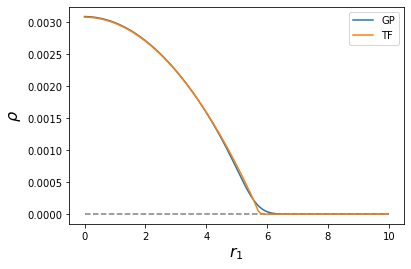

In [13]:
plt.plot(x,density_c2,label='GP')
plt.plot(x,density_c2t,label='TF')
plt.legend()
plt.hlines(0,xmin=0,xmax=10, linestyles='dashed', colors='grey')
plt.xlabel('$r_1$',fontsize=16)
plt.ylabel(r"$\rho$",fontsize=16)
plt.rc("axes",labelsize=16)
plt.savefig('N10.png',bbox_inches='tight')
plt.show()

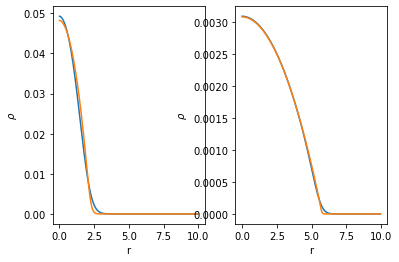

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x,density_c1,label='GP')
ax1.plot(x,density_c1t,label='TF')
ax2.plot(x,density_c2,label='GP')
ax2.plot(x,density_c2t,label='TF')
ax1.set(xlabel='r', ylabel=r"$\rho$")
ax2.set(xlabel='r', ylabel=r"$\rho$")
plt.show()

In [75]:
section_e = GrossPitaevskiiProblem(
                                    particle_number=1000,
                                    grid_size=10, 
                                    grid_step=0.02, 
                                    scattering_length=0.00433, 
                                    sigma=0.5, 
                                    time_step = 0.0001, 
                                    iterations=20000, 
                                    thomas_fermi=False,
                                    interacting_system=True
                                    )

In [76]:
chemical_potential_section_e = section_e.evolution()

100%|██████████| 20000/20000 [00:37<00:00, 532.60it/s]


In [77]:
virial=section_e.virial

In [78]:
virial

-0.01231478906953809